In [172]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import pickle
import networkx as nx
import numpy as np
import random
import time
import statistics
import math
from itertools import chain 
from IPython.display import Image

In [173]:
# Функция построения графика распределения степеней вершин в графе
def draw_graf(G):
  degree = dict(G.degree())
  degree_values = sorted(set(degree.values()))
  hist = [list(degree.values()).count(x) for x in degree_values]
  plt.figure(figsize=(10, 10))
  plt.plot(degree_values, hist, 'ro-')
  plt.legend(['Degree'])
  plt.xlabel('Degree')
  plt.ylabel('Number of nodes')
  plt.show()

In [174]:
def koef(G1,G2,G3,G4): #сравнение характеристик
  N1 =  len(list(G1.nodes()))
  M1 =  len(list(G1.edges()))
  N2 =  len(list(G2.nodes()))
  M2 =  len(list(G2.edges()))
  N3 =  len(list(G3.nodes()))
  M3 =  len(list(G3.edges()))
  N4 =  len(list(G4.nodes()))
  M4 =  len(list(G4.edges()))
 
  #реальная модель
  L_s, C_s = [], []
  L_connected_subgraphs = []
  connected_graphs = list((G1.subgraph(c) for c in nx.connected_components(G1)))
  for x in connected_graphs:
      path_length = nx.average_shortest_path_length(x)
      L_connected_subgraphs.append(path_length)
  
  L1 = np.mean(L_connected_subgraphs)
  C1 = nx.average_clustering(G1)

  print('Реальная модель:')
  print('C:',C1)
  print('L:',L1)
  
  #модель малого мира Уоттса-Строгацца
  K2 = (2*M2)/N2
  C2 = K2/(N2-1)
  L2 = math.log(N2)
  
  #модель случайного графа Эрдеша-Реньи
  MAX = (N3*(N3 - 1))/2 #максимальное количество возможных связей
  p = N3/MAX #вероятность образования связи
  K3 = (N3-1)*p
  C3 = K3/N3
  L3 = math.log(N3)/math.log(K3)
  
  #модель барабаши-альберт
  C4 = math.pow(N4,-0.75)
  L4 = math.log(N4)/(math.log(math.log(N4)))
  
  #расчет ошибок для модели
  E2 = (abs(C1-C2))+(abs(L1-L2))
  E3 = (abs(C1-C3))+(abs(L1-L3))
  E4 = (abs(C1-C4))+(abs(L1-L4))
  

  print('\nМодель малого мира Уоттса-Строгацца:')
  print('C:',C2)
  print('L:',L2)
  print('Разница:',E2)
 
  print('\nМодель случайного графа Эрдеша-Реньи:')
  print('C:',C3)
  print('L:',L3)
  print('Разница:',E3)
  
  print('\nМодель Барабаши-Альберт:')
  print('C:',C4)
  print('L:',L4)
  print('Разница:',E4)


In [175]:
def graf_degree(G): #построение графика степенного распределения
  n=G.degree()
  # Isolate the sequence of degrees
  degree_sequence = list(G.degree())
  nb_nodes = n
  nb_arr = len(G.edges())
  avg_degree = np.mean(np.array(degree_sequence)[:,1].astype(float))
  med_degree = np.median(np.array(degree_sequence)[:,1].astype(float))
  max_degree = max(np.array(degree_sequence)[:,1].astype(float))
  min_degree = np.min(np.array(degree_sequence)[:,1].astype(float))

  print("Number of nodes : " + str(nb_nodes))
  print("Number of edges : " + str(nb_arr))
  print("Maximum degree : " + str(max_degree))
  print("Minimum degree : " + str(min_degree))
  print("Average degree : " + str(avg_degree))
  print("Median degree : " + str(med_degree))

  degree_freq = np.array(nx.degree_histogram(G)).astype('float')
  plt.figure(figsize=(12, 8))
  plt.stem(degree_freq)
  plt.ylabel("Frequence")
  plt.xlabel("Degre")
  plt.show()

In [176]:
def print_no_edg(G1,G2,G3,G4): #вывод числа вершин
  print('Число вершин G1:', len(list(G1.nodes())))
  print('Число ребер G1:', len(list(G1.edges())))
  print('--------------------')
  print('Число вершин G2:', len(list(G2.nodes())))
  print('Число ребер G2:', len(list(G2.edges())))
  print('--------------------')
  print('Число вершин G3:', len(list(G3.nodes())))
  print('Число ребер G3:', len(list(G3.edges())))
  print('--------------------')
  print('Число вершин G4:', len(list(G4.nodes())))
  print('Число ребер G4:', len(list(G4.edges())))

In [177]:
vk_group_id = 43552479 #id сообщества

In [178]:
# Получение коэффициентов схожести графа с моделью Малого мира
def small_world_similarity(G):
    L_s, C_s = [], []
    
    L_connected_subgraphs = []
    connected_graphs = list((G.subgraph(c) for c in nx.connected_components(G)))
    for x in connected_graphs:
        path_length = nx.average_shortest_path_length(x)
        L_connected_subgraphs.append(path_length)
    
    L = np.mean(L_connected_subgraphs)
    C = nx.average_clustering(G)
    print('L ', L)
    print('C ', C)

In [179]:
# Открываем наш граф в networkx
G1 = nx.read_edgelist('friends_inside_' + str(vk_group_id) + '.txt') #чтение связей из файла
N = len(list(G1.nodes())) #количество вершин
M = len(list(G1.edges())) #количество связей (ребер)

MAX = (N*(N - 1))/2 #максимальное количество возможных связей
p = N/MAX #вероятность образования связи
k = (2*M)/N #степень узла (кол-во связей у вершины)

print('Количество вершин:', N)
print('Количество связей:', M)
print('Максимальное количество возможных связей',MAX)
print('Вероятность образования связи',p)
print('Степень узла',k)

Количество вершин: 1044
Количество связей: 1217
Максимальное количество возможных связей 544446.0
Вероятность образования связи 0.0019175455417066154
Степень узла 2.3314176245210727


In [180]:
#модель малого мира Уоттса-Строгацца - (The number of nodes, Each node is joined with its k nearest neighbors in a ring topology, The probability of rewiring each edge)
G2 = nx.watts_strogatz_graph(N, int(k), 2) 

print('Число вершин G2:', len(list(G2.nodes())))
print('Число ребер G2:', len(list(G2.edges())))

Число вершин G2: 1044
Число ребер G2: 1044


In [181]:
#модель случайного графа Эрдеша-Реньи - (The number of nodes, Probability for edge creation)
G3 = nx.erdos_renyi_graph(N,p) 

print('Число вершин G3:', len(list(G3.nodes())))
print('Число ребер G3:', len(list(G3.edges())))

Число вершин G3: 1044
Число ребер G3: 1059


In [182]:
#модель Барабаши-альберт - (Number of nodes, Number of edges to attach from a new node to existing nodes)
G4 = nx.barabasi_albert_graph(N,int(k)) 

print('Число вершин G4:', len(list(G4.nodes())))
print('Число ребер G4:', len(list(G4.edges())))

Число вершин G4: 1044
Число ребер G4: 2084


In [183]:
koef(G1,G2,G3,G4)

Реальная модель:
C: 0.0668944417897503
L: 1.07934654740652

Модель малого мира Уоттса-Строгацца:
C: 0.0019175455417066154
L: 6.950814768442584
Разница: 5.936445117284107

Модель случайного графа Эрдеша-Реньи:
C: 0.0019157088122605363
L: 10.027905996569885
Разница: 9.013538182140856

Модель Барабаши-Альберта:
C: 0.005444708407722421
L: 3.5850029211288166
Разница: 2.567106107104325


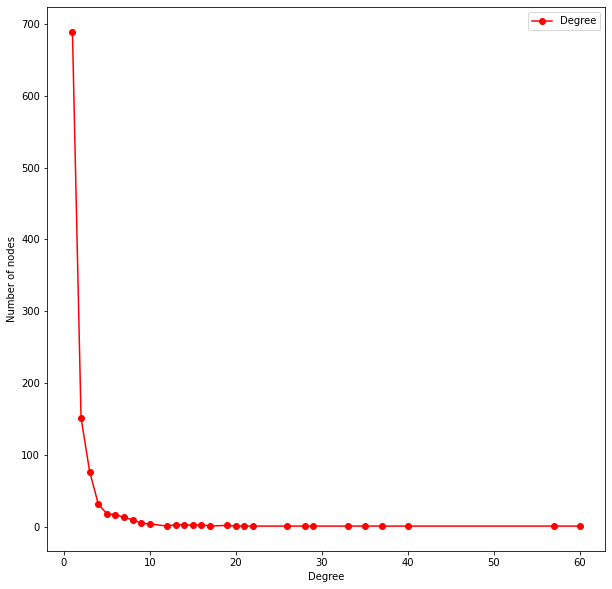

In [184]:
draw_graf(G1)#реальная модель

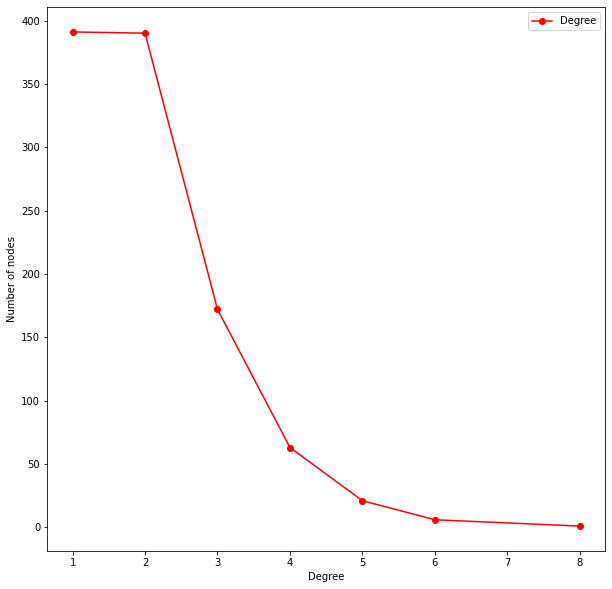

In [185]:
draw_graf(G2)#модель малого мира

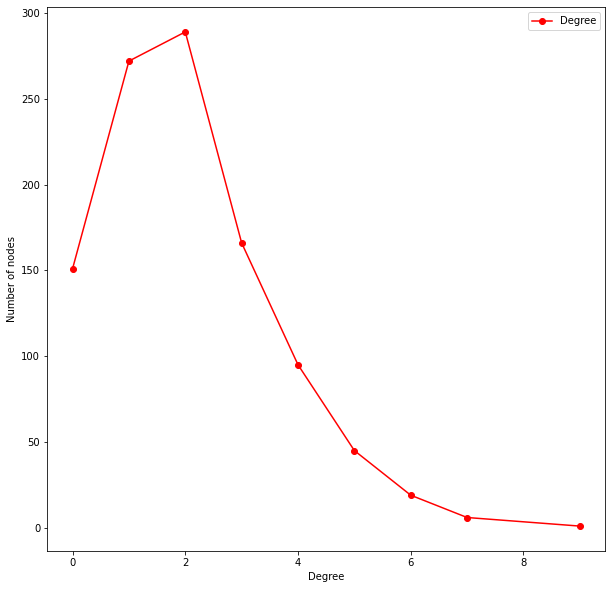

In [186]:
draw_graf(G3)#модель случайного графа

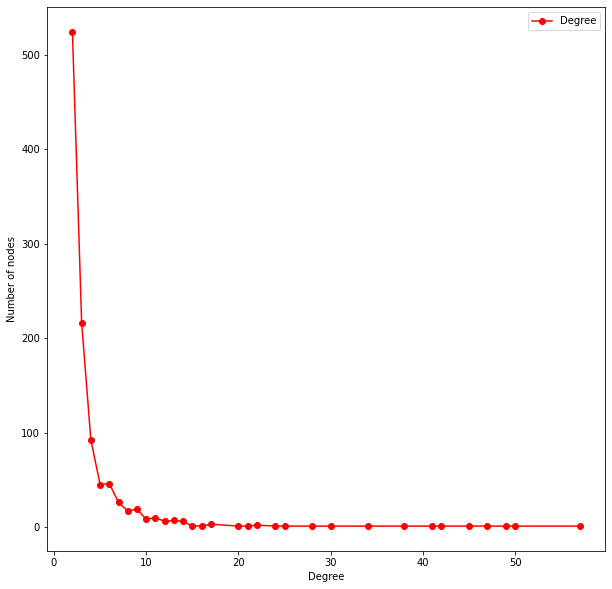

In [187]:
draw_graf(G4)#модель барабаши-альберт

In [188]:
koef(G1,G2,G3,G4)

Реальная модель:
C: 0.0668944417897503
L: 1.07934654740652

Модель малого мира Уоттса-Строгацца:
C: 0.0019175455417066154
L: 6.950814768442584
Разница: 5.936445117284107

Модель случайного графа Эрдеша-Реньи:
C: 0.0019157088122605363
L: 10.027905996569885
Разница: 9.013538182140856

Модель Барабаши-Альберта:
C: 0.005444708407722421
L: 3.5850029211288166
Разница: 2.567106107104325


Number of nodes : [('49899', 3), ('53557738', 6), ('47809485', 37), ('44212462', 7), ('55424', 7), ('3692672', 7), ('101747664', 6), ('442643', 2), ('4172919', 33), ('29389722', 3), ('126710', 2), ('35901700', 3), ('188019', 2), ('144314922', 1), ('1867150', 1), ('192908', 4), ('12018081', 57), ('34773531', 14), ('2531829', 6), ('47245606', 3), ('290863', 5), ('274091793', 19), ('202154966', 4), ('8951065', 1), ('284111163', 1), ('263407996', 1), ('335821', 2), ('81934307', 5), ('245595011', 6), ('78558920', 26), ('472743', 1), ('9669114', 1), ('591679', 1), ('231776460', 1), ('697921', 1), ('82592621', 1), ('796932', 3), ('127452421', 1), ('79986983', 3), ('853427', 1), ('85956644', 40), ('988339', 1), ('4263960', 5), ('1006055', 1), ('99792450', 10), ('1017822', 1), ('288765707', 2), ('1059258', 1), ('2260475', 1), ('1210049', 1), ('1219473', 3), ('11394096', 1), ('47043833', 1), ('6550858', 3), ('1228157', 4), ('237509707', 1), ('53180371', 7), ('108390142', 28), ('1328253', 1), ('1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


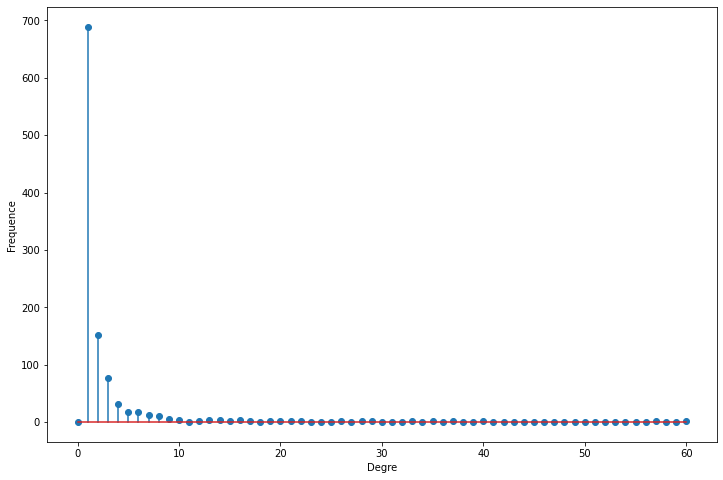

Number of nodes : [(0, 2), (1, 2), (2, 4), (3, 1), (4, 1), (5, 2), (6, 1), (7, 2), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 2), (16, 3), (17, 1), (18, 2), (19, 1), (20, 2), (21, 1), (22, 2), (23, 1), (24, 1), (25, 6), (26, 2), (27, 2), (28, 2), (29, 5), (30, 1), (31, 1), (32, 1), (33, 1), (34, 2), (35, 1), (36, 1), (37, 3), (38, 1), (39, 3), (40, 1), (41, 1), (42, 2), (43, 2), (44, 2), (45, 3), (46, 1), (47, 3), (48, 1), (49, 2), (50, 5), (51, 3), (52, 2), (53, 1), (54, 1), (55, 1), (56, 1), (57, 2), (58, 1), (59, 2), (60, 4), (61, 3), (62, 1), (63, 3), (64, 2), (65, 1), (66, 2), (67, 2), (68, 2), (69, 4), (70, 3), (71, 3), (72, 4), (73, 2), (74, 2), (75, 2), (76, 1), (77, 2), (78, 3), (79, 1), (80, 2), (81, 2), (82, 1), (83, 1), (84, 2), (85, 1), (86, 2), (87, 3), (88, 2), (89, 4), (90, 2), (91, 2), (92, 2), (93, 1), (94, 2), (95, 2), (96, 1), (97, 2), (98, 1), (99, 3), (100, 4), (101, 4), (102, 3), (103, 5), (104, 2), (105, 3), (106, 2), (107, 3), (108, 1), (

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


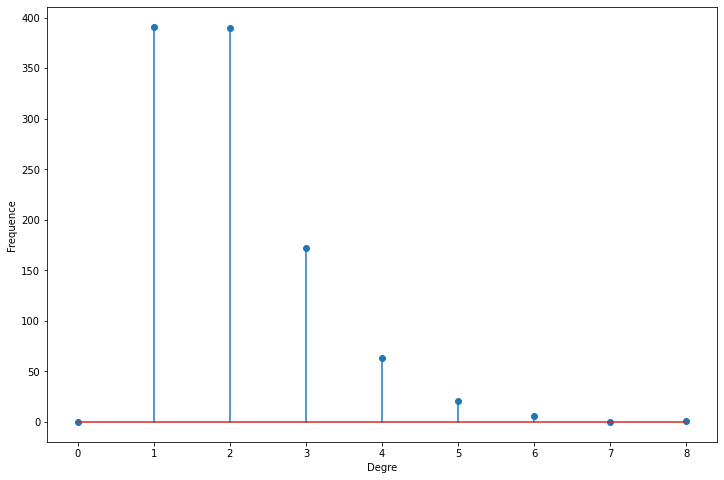

Number of nodes : [(0, 1), (1, 2), (2, 1), (3, 3), (4, 3), (5, 1), (6, 1), (7, 4), (8, 4), (9, 1), (10, 2), (11, 1), (12, 2), (13, 0), (14, 3), (15, 1), (16, 2), (17, 2), (18, 2), (19, 2), (20, 1), (21, 6), (22, 3), (23, 3), (24, 2), (25, 2), (26, 4), (27, 2), (28, 1), (29, 0), (30, 1), (31, 1), (32, 4), (33, 2), (34, 2), (35, 4), (36, 2), (37, 1), (38, 0), (39, 2), (40, 4), (41, 1), (42, 3), (43, 2), (44, 3), (45, 4), (46, 0), (47, 2), (48, 1), (49, 6), (50, 1), (51, 4), (52, 3), (53, 3), (54, 1), (55, 2), (56, 4), (57, 4), (58, 2), (59, 4), (60, 3), (61, 0), (62, 0), (63, 4), (64, 5), (65, 2), (66, 5), (67, 4), (68, 5), (69, 4), (70, 1), (71, 2), (72, 2), (73, 3), (74, 2), (75, 2), (76, 1), (77, 1), (78, 1), (79, 2), (80, 3), (81, 0), (82, 1), (83, 6), (84, 0), (85, 2), (86, 2), (87, 1), (88, 2), (89, 1), (90, 1), (91, 0), (92, 1), (93, 1), (94, 2), (95, 2), (96, 1), (97, 3), (98, 0), (99, 0), (100, 2), (101, 1), (102, 2), (103, 1), (104, 2), (105, 3), (106, 3), (107, 2), (108, 1), (

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


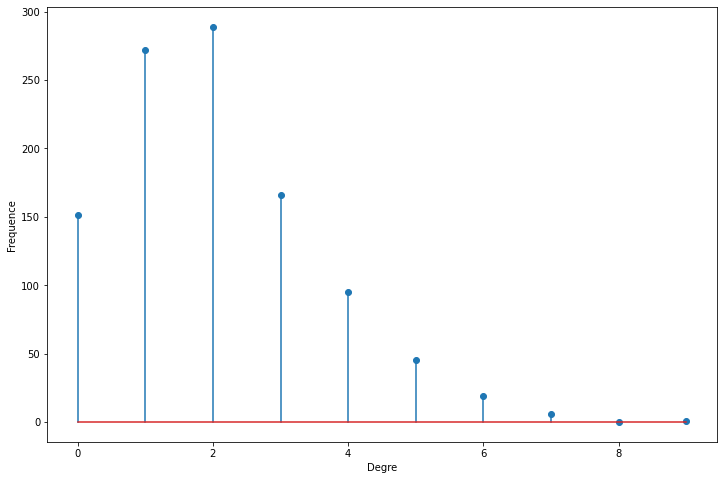

Number of nodes : [(0, 50), (1, 45), (2, 11), (3, 25), (4, 57), (5, 47), (6, 41), (7, 10), (8, 42), (9, 11), (10, 38), (11, 16), (12, 7), (13, 12), (14, 3), (15, 22), (16, 30), (17, 2), (18, 28), (19, 49), (20, 34), (21, 8), (22, 12), (23, 24), (24, 9), (25, 22), (26, 14), (27, 4), (28, 9), (29, 12), (30, 21), (31, 13), (32, 11), (33, 20), (34, 9), (35, 12), (36, 11), (37, 7), (38, 9), (39, 14), (40, 4), (41, 8), (42, 4), (43, 13), (44, 7), (45, 13), (46, 17), (47, 6), (48, 6), (49, 6), (50, 17), (51, 5), (52, 2), (53, 4), (54, 14), (55, 2), (56, 6), (57, 10), (58, 7), (59, 8), (60, 3), (61, 14), (62, 7), (63, 9), (64, 3), (65, 10), (66, 8), (67, 4), (68, 6), (69, 2), (70, 6), (71, 9), (72, 7), (73, 2), (74, 4), (75, 3), (76, 4), (77, 5), (78, 3), (79, 13), (80, 6), (81, 14), (82, 9), (83, 2), (84, 5), (85, 10), (86, 6), (87, 6), (88, 2), (89, 7), (90, 4), (91, 3), (92, 6), (93, 7), (94, 7), (95, 6), (96, 9), (97, 6), (98, 17), (99, 9), (100, 6), (101, 14), (102, 11), (103, 4), (104, 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


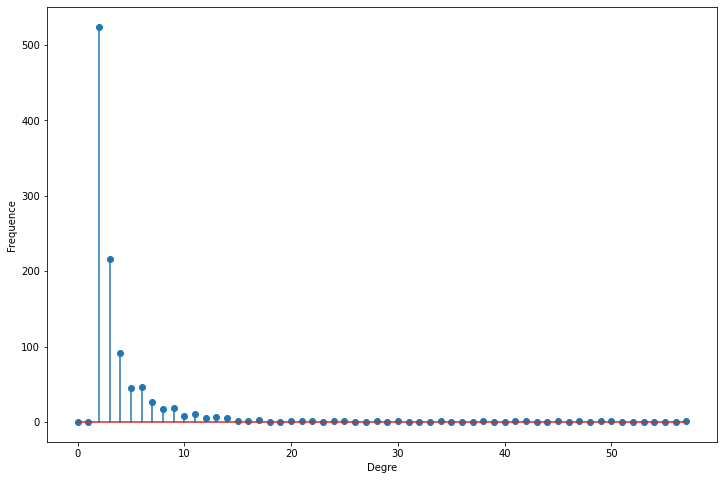

In [189]:
graf_degree(G1)
graf_degree(G2)
graf_degree(G3)
graf_degree(G4)

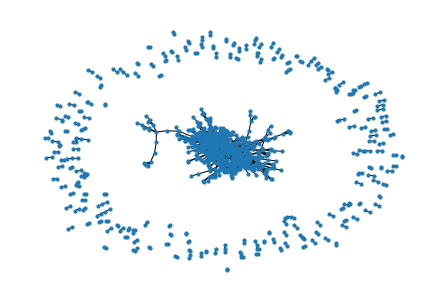

In [190]:
nx.draw(G1, node_size=10) #реальная модель

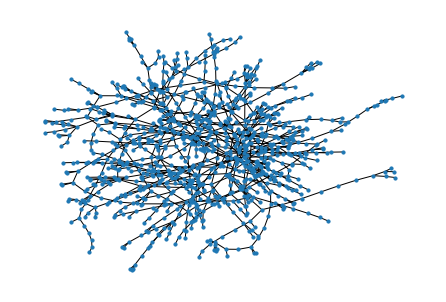

In [191]:
nx.draw(G2, node_size=10) #модель малого мира

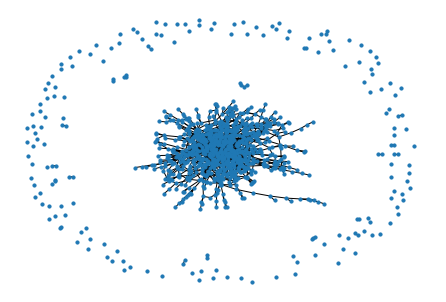

In [192]:
nx.draw(G3, node_size=10)#модель случайного графа

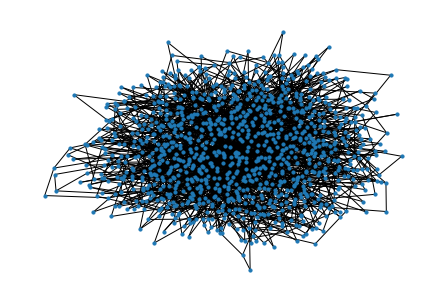

In [193]:
nx.draw(G4, node_size=10)#модель барабаши-альберта